In [4]:
import curvature as c
import manifold as m
import math
import matplotlib.pyplot as plt
from scipy.io import mmread
import numpy as np
from scipy.special import gamma
from sklearn.manifold import Isomap
import multiprocessing as mp
import csv

In [36]:
# function for computing scalar curvatures

def computeSs2(X, kfunc, nballs, spacing, Rdist, version, rmax = None):
    sce = c.scalar_curvature_est(X, 2, 20, kfunc, Rdist = Rdist, verbose = True, bounds = None, version = version)
    Ss = sce.estimate_all(rmax = rmax, nballs = nballs, spacing = spacing)
    return Ss

In [41]:
# function to compute Ss for and plot a dataset from a file

def plotbio(dataname, nballs, spacing, denversion):
    # gets file names
    mtxfile = 'datasets/' + dataname + '.mtx'
    umapcds = 'datasets/' + dataname + '-UMAP.csv'
    pltname = dataname + ' ss'
    # unpacks sparse matrix with coordinates
    a = mmread(mtxfile)
    A = a.todense()
    B = (A.A).T
    umap1 = []
    umap2 = []
    with open(umapcds, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            umap1.append(float(row['UMAP-1']))
            umap2.append(float(row['UMAP-2']))
    # uses original points to compute curvatures
    bioSs = computeSs2(B, 0, nballs, spacing, None, denversion, None)
    
    %matplotlib inline

    # plots curvature for points on their UMAP coords
    plt.scatter(umap1, umap2, s = 3, c = bioSs, cmap = 'magma')
    plt.title(pltname)
    plt.xlim()
    plt.colorbar()
    plt.show()

    return bioSs
    

computed Rdist
computed nearest neighbor distances
computed density


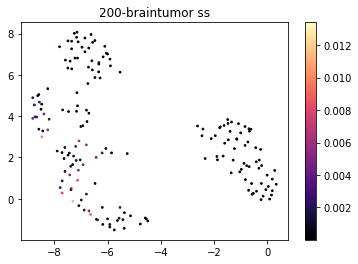

In [43]:
brainss = plotbio('200-braintumor', 250, 0.01, 0)

computed Rdist
computed nearest neighbor distances
computed density


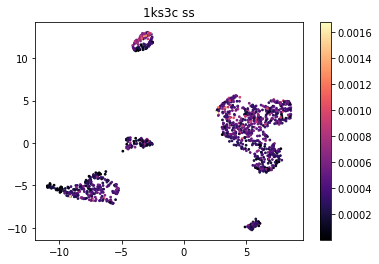

In [45]:
pbmc1k = plotbio('1ks3c', 250, 0.01, 0)

In [2]:
glioblastoma2k = [9.924249852464676e-05, 0.00010220070990969478, 0.0013338218961213256, 3.0675832903131014e-05, 0.00020852315185043068, 0.00016457150040299939, 7.911449028317361e-05, 0.0017280095136735047, 0.007136007064351043, 0.0004687426214634824, 0.0033269390009340047, 0.00019767892820505027, 0.0008339184616368437, 0.00024340210865323998, 2.842357719254917e-05, 0.00011416499757806483, 0.003435706375322075, 0.0012637828903578224, 0.013257360313516847, 0.00010936738549725656, 0.00013489672138796015, 0.0005749867281370736, 3.1804153275232705e-05, 8.678237878354851e-05, 5.152483523087112e-05, 0.0004392512488054332, 2.4760420804826006e-05, 0.0019802826335149036, 0.0006546082065706255, 8.147806909347394e-05, 0.00010482692276163807, 0.019870405426769044, 0.00029169537535763936, 0.002557388474835799, 0.0013893202117283704, 0.0003916463559455692, 0.003119821867257893, 6.761689934821996e-05, 0.00038464346691485264, 3.424041657794199e-05, 0.00045362432385806864, 0.0006546082065706255, 5.3619150273306754e-05, 0.022456938248192882, 0.000604602881743429, 0.00024458505233515847, 0.007903734029196257, 0.00022467027333176792, 3.886607768242351e-05, 0.0008484414525857578, 1.7098579005564212e-05, 0.00018570601182416524, 0.0020604004465024257, 0.0013893202117283704, 0.0009371357236825515, 7.51240057324427e-05, 0.00047325035097469433, 5.392136383658978e-05, 0.00659973821056172, 0.0021407533402497294, 0.0008082317731243127, 3.685063056647606e-05, 0.009340184491695411, 9.655468487970004e-05, 0.001672515652163965, 0.00015208979037008757, 0.0016162938187815744, 0.004835031187246024, 7.64450420595817e-06, 0.00011596210078403566, 0.00853060605020601, 8.108132961727684e-05, 8.772256772094523e-05, 0.00010901173150548668, 0.00022603606071947864, 0.00021167789005444742, 8.483179032510223e-05, 0.001196107817643665, 9.573611206394903e-05, 0.0003639185367609241, 9.685508326072196e-05, 3.45002473335648e-05, 0.0139150234015415, 8.524217775472378e-05, 0.0005062271834797117, 8.826293802432068e-05, 0.00018836354403257695, 8.904120779473096e-05, 0.00010644539034844118, 4.664228704670867e-05, 3.6048046005530905e-05, 0.012325466246634728, 0.019337662500788336, 0.00012022306479900347, 0.0001632607757657406, 0.00018475633293609504, 0.0012468942888760107, 0.00021102944192242856, 0.0019355412100467797, 0.003813221681784649, 0.00019778519829787326, 2.347817615580892e-05, 2.6482384073624597e-05, 4.677313798029458e-05, 0.00045513882092150797, 3.053011365635579e-05, 0.00018131503091298247, 6.860158015428363e-05, 8.147197010564594e-05, 0.000635115314603542, 0.0004826582484267018, 0.0008834284643598677, 0.0017943474092586738, 0.006699480304527812, 1.4404288244464128e-05, 0.00012412898217798422, 8.52686319674554e-05, 0.00030600255173768754, 0.0003395568100116445, 0.002301354798473682, 0.02202902709433144, 0.001626363961545519, 0.00017658177949764363, 0.012070346139354721, 3.654763835856265e-05, 0.0006837238801911359, 0.008806300213965605, 0.00028265572521056053, 0.0009179204056476044, 0.0022783540797007666, 7.406886839415582e-05, 3.288840485673522e-05, 6.473058090759664e-05, 9.68347112877553e-05, 0.00012179668083247498, 0.00017684550353590648, 1.831313293317069e-05, 0.0002488706715973066, 0.00013480645641132533, 0.000761434801972785, 0.00022611515782325917, 0.00822481940709038, 0.00039802437369028366, 4.8312350473652535e-05, 0.013873473714469349, 8.167734199657465e-05, 3.061353017444612e-05, 0.001187213731470064, 0.0017689465833062175, 0.0001973200913941415, 0.0003508998708062651, 0.00011052640004715449, 9.606263986698807e-05, 5.364929111972646e-05, 0.0006353014395548305, 0.018043587765218274, 0.00014347994410553703, 0.007305833353549503, 0.00032470900166554965, 0.00044873033648016886, 6.350986154467442e-05, 0.00014354191894487607, 0.00019253058549145675, 0.0001470251195159664, 0.00015472985525343395, 0.0001983330717000901, 0.004149514397501082, 2.0714931549275034e-05, 0.0003495135296374623, 0.001633852200404887, 0.00015603674059702896, 0.015337417438294441, 0.00021097005558157813, 0.00028537972607348675, 0.0003326208145927846, 2.5479627130623092e-05, 0.0021214146025787463, 0.0001385667996116923, 8.14135216344596e-05, 5.6899876291038645e-05, 0.00029229123046674576, 2.37238815427198e-05, 0.00012410709605469136, 4.3575333115175156e-05, 0.015187112156754626, 0.003435706375322075, 0.002834033334284714, 4.269031727167967e-05, 1.870995604198297e-05, 0.00250749588102001, 8.277968401743667e-05, 5.116706481436714e-05, 7.301936769928251e-05, 1.3340298409524312e-05, 0.00010315773653803262, 0.0004957011307065006, 0.011068601748478778, 0.0036962931610189315, 0.00028382734773899543, 0.00010674919977244643, 0.0001227953118212531, 0.013915155647823613, 0.0003681652050226757, 0.014022334901019094, 0.00015846456360257756, 0.0001465146338597953, 6.034294067920964e-05, 1.578705883530624e-05, 8.83763139237867e-05, 0.0003432011135945587, 6.203503490243866e-05, 2.4760420804826006e-05, 0.00014150873859108745, 0.0002735137075192948, 0.0018632146418116312, 2.6780256687634023e-05, 3.45002473335648e-05, 0.00021216058391538406, 7.034744457684263e-05, 0.0037113882581896684, 0.0006153669571881154, 0.001255965857845283, 0.0003167867433831787, 0.00014005590935335088, 0.006454500768303608, 0.00524968769982523, 0.002600337033368229, 0.0018878141102117562, 7.171009891302916e-05, 0.00017436388471027268, 0.0022400394925703735, 2.982707895851297e-05, 3.0691153466526476e-05, 0.0001359646021328702, 7.870985379807271e-05, 0.007752253105675634, 0.00010929698399012399, 0.00011221192276038518, 0.0036109383700975452, 0.0002073280033205671, 0.00016804667572890137, 0.019290768094064523, 0.00011020225028046042, 0.0005409811296755607, 0.004187059135643153, 1.620441643968078e-05, 0.00013310653195590483, 2.0879424143079732e-05, 3.0675832903131014e-05, 0.017048832166576558, 3.2889623531038254e-05, 4.709151165876737e-05, 0.0014773814843922614, 0.0006772753361776997, 1.875886885335258e-05, 0.00033739860674585076, 0.00014058089393321905, 5.7304563066256766e-05, 0.008128348242653419, 0.00021291625764172648, 0.000697323371008073, 0.00020372985411454066, 8.34254708838453e-05, 5.316611325297183e-05, 6.601518067371134e-05, 0.0002487411850576409, 0.00027179049761026603, 0.0001488721523856369, 0.008213066622658326, 0.0005655376486057503, 0.012639321795644781, 0.0007203992740890915, 0.0003729718683854934, 0.02239220630164386, 0.012209330611643608, 0.0015448265048029113, 9.923262543571441e-05, 0.007176265057727973, 1.055187328693257e-05, 0.0002469653946989796, 0.002536850918206275, 0.00039121005020225887, 0.00011251526472824488, 7.820856784930692e-05, 1.1448515828605649e-05, 0.00010006343742480862, 0.0004099772364472569, 0.0010077413038723977, 0.00010482692276163807, 0.00029229123046674576, 0.00027504351677406694, 0.005242678024887561, 4.563787075366402e-06, 0.00990535544819436, 5.2935143077082626e-05, 0.009002627877848446, 4.224919996157836e-05, 0.0003117276412374656, 0.0002009361378665015, 2.6325116204665535e-05, 9.54643016912453e-05, 6.710724877369344e-05, 0.00018463794983249483, 0.0003092862951180836, 0.0001381723276207129, 0.0002556692533538836, 0.004744546690167033, 6.509864380203225e-05, 0.008543044491723531, 0.00011087300284329254, 0.007618371270480527, 0.0003238989687743322, 0.003480213946399676, 1.6517562992617852e-05, 0.001311098754329478, 0.00033065942715969045, 0.005305251316989738, 0.0098716764949914, 3.0523231394621514e-05, 0.0006173102357827896, 0.0001488721523856369, 1.4514013519161597e-05, 0.0011798538665587317, 0.0003101736419321917, 4.539213494406328e-05, 0.010348095028288259, 0.0008640078055262947, 7.249834462516086e-05, 0.00012333892501851146, 3.055471296227222e-05, 5.341768424689559e-05, 0.0007155121315182304, 0.0007536810215915138, 8.123454451679305e-05, 0.002423693920128403, 9.32075393928218e-05, 0.00012567706727648363, 0.0003050493009433025, 5.965701332380898e-05, 7.915005487606479e-05, 0.0001363232392392647, 0.01810003060625883, 4.741293750120224e-05, 3.183165347157352e-05, 0.00039426526139881165, 0.013772247699249542, 0.015116446184716597, 0.017072935936160622, 3.354787859011423e-05, 7.01276501073028e-05, 0.00021396032097115652, 0.001992253915730984, 3.9352071453288157e-05, 0.0002797243910922281, 5.005866236628571e-05, 2.6419624649759678e-05, 2.7216511900070182e-05, 0.00014445358972495014, 4.620672381435154e-05, 0.00013469718575172837, 0.000435986399161807, 0.0018022352569061393, 0.005759435719413295, 0.00014576925957941574, 6.046754971997207e-05, 0.000166026664557983, 0.00017282938505869337, 4.193112404365626e-05, 0.0036365249810077884, 0.0018122909167081185, 9.32075393928218e-05, 0.0008082317731243127, 0.0020115025555419433, 0.00013916558497494805, 0.001713669059905242, 0.00010053789201985977, 0.00015947868187808094, 9.096339636549765e-05, 2.454259473623852e-05, 0.010842727122873163, 0.00024645868509332226, 0.01501830656932821, 1.5221182301572301e-05, 0.0031251792121093054, 0.019432123182642425, 0.00038432828127157523, 5.554602037780506e-05, 6.99480205832752e-05, 0.0001897775192238384, 0.0005232330693019728, 0.0002871077857735822, 7.520209356066336e-05, 0.001274694932657919, 4.0745547859564834e-05, 2.9385847997094627e-05, 0.0002302150534054698, 6.61331187223165e-05, 0.001713669059905242, 0.00029004547857163865, 0.0003359088581289066, 0.0009371394668091242, 0.005759435719413295, 0.00010691942365961783, 8.293166344607436e-05, 0.00013430934557923726, 2.5195273596258515e-05, 0.014493760468032836, 0.0002831513891784423, 4.9379534134162826e-05, 0.00016959202423234244, 0.0006895777947569337, 5.1365858680678476e-05, 0.00021137475191540316, 0.011657340483262585, 2.9248534108305416e-05, 0.006699480304527812, 0.00910362216762261, 0.0076636347467441916, 8.586090954401646e-05, 0.0064125401114638984, 0.00012368057668244267, 0.0002345700499840394, 3.5029416800862175e-05, 0.00012410709605469136, 0.00028445574620989983, 1.8328603838847828e-05, 0.00014046123369585288, 0.0003467281881807579, 0.0004965572247667805, 7.374043860821037e-05, 0.0001615333059603773, 3.875079686446822e-05, 0.019337012880636547, 4.5316153140174625e-05, 1.9927248527774584e-05, 0.0026321204055328716, 7.29541915594928e-05, 0.00010792210871731099, 0.0003395230263260564, 6.473058090759664e-05, 0.00015142463182834793, 0.00278830897122814, 9.480124414843921e-05, 3.385632251159744e-05, 3.712593298407882e-05, 0.005283835020315757, 9.68347112877553e-05, 0.0019868978601966887, 0.011353763518892689, 8.428650687003078e-05, 0.0003120574310361446, 0.0070447772816040095, 0.0003456844786848605, 0.00012596423921063817, 0.0002560142945961188, 8.294195707738659e-05, 0.00014093778131337765, 0.0002927277837318339, 4.824143154220734e-05, 0.0003376265727934278, 1.767286529975616e-05, 3.1463728294630685e-05, 0.00023644460925154558, 0.01594795700940991, 9.249847623337177e-05, 0.0010671032700619453, 0.00014596136646085605, 7.054243104285374e-05, 3.2339458823051645e-05, 1.7828975284639333e-05, 5.188742164597848e-05, 0.001698592804407745, 0.00020155089945372902, 0.0004568724012760109, 0.0019070784998706587, 3.411315315446595e-05, 0.00040690999662057725, 1.2211751028178885e-05, 3.5900773418736924e-05, 4.8087086610284146e-05, 0.0001519979965681718, 0.00021751842269351947, 0.00017215644113863018, 0.004868983103932179, 9.559886830218394e-05, 0.011994991066347136, 0.00010577324672669179, 2.1167198492462998e-05, 0.0001105019078570403, 7.250690517428428e-05, 0.000332537471661132, 4.735436603869562e-05, 0.01533613196895394, 0.00017689520312115926, 0.008083518235023412, 0.0006678464828120375, 0.000991000251620114, 0.0012606410101380903, 0.012968538498860108, 0.00012085687887137194, 3.564111125317801e-05, 0.0018745448127191395, 0.0001798250572815852, 0.0002560142945961188, 0.011453076668271662, 0.004206521394299698, 0.00021012836092125693, 0.0008689928455550957, 1.7616259601145433e-05, 0.01541635029952843, 0.007381637349216215, 0.0005292801622517903, 0.010974425393276071, 0.0018122909167081185, 6.328918059475138e-05, 5.6899876291038645e-05, 0.0008339184616368437, 0.0003532664176655386, 0.0002529661734600714, 6.88138705697924e-05, 7.022285583636873e-05, 0.002248749742500321, 7.829679120779482e-05, 4.47473211738829e-05, 0.0023725270659859265, 5.1805398073835216e-05, 0.008659853870768201, 0.0003083243398724679, 5.582264305590687e-05, 0.01087806511263288, 0.0004957011307065006, 0.0005714193278183987, 0.00025041149044004396, 0.0007497923791122047, 6.753357854575744e-05, 5.582316341002504e-05, 0.0004384688241925667, 7.641441938732491e-05, 0.0002846217558914375, 0.0025540756264093123, 0.0004550954332691709, 7.016072689727187e-05, 0.0009128559440858672, 5.224580469370084e-05, 3.1338325100488065e-05, 0.0004002110040364508, 0.0007337948057861169, 0.0010844097831669303, 8.352150138836753e-05, 5.0178610837369076e-05, 0.00031951925122489076, 0.0010823903049227556, 0.0005409811296755607, 5.731898297448862e-06, 2.6482384073624597e-05, 0.0011140071255890038, 0.0008311256176483262, 0.0007236141361407313, 0.00025460714457053177, 9.492001886132135e-05, 0.01330247943125891, 6.350986154467442e-05, 0.005748183298176917, 4.8101665363132476e-05, 0.0021214146025787463, 0.0009424431933338582, 0.00014420894063957545, 0.0012412331770785172, 1.2106444280969242e-05, 0.0033448208826342483, 0.004447464641434739, 3.09916317033329e-05, 6.809057582938127e-05, 6.927206122255895e-05, 0.0011009167033369258, 0.0001260757244961999, 0.007381637349216215, 0.00013417679984352237, 0.0002345700499840394, 0.00013974753154602458, 8.240536726944864e-05, 2.3572446001786024e-05, 0.0001495159450775193, 0.0013433951585257232, 0.002747862418118627, 0.000486089130316154, 0.0001698967717573259, 0.0007498395594498608, 0.00025031184488986924, 0.0003586774828651329, 4.89814554675555e-05, 0.0018994411771022012, 3.291297632773231e-05, 0.00011128384006426554, 0.00011903139968365415, 7.026818468463107e-05, 0.00018886035516154566, 0.000334404133106073, 8.881066985315383e-05, 0.0021693418099570233, 9.923797311486863e-05, 0.0027995179542409173, 8.642277955711407e-05, 0.007161009594936733, 0.00031896484475345895, 8.431499982158363e-05, 0.0004256857735068556, 7.054243104285374e-05, 0.00010620735562260078, 0.008089094766251742, 7.160910538516943e-05, 0.00011748303518739377, 0.002557388474835799, 0.0017168903317204486, 5.9178148496517174e-05, 0.0006766026120857092, 0.0002487411850576409, 0.012325466246634728, 0.0006730689059497716, 0.00031729581063507566, 0.0004346923810645652, 8.629725003607155e-05, 4.540400593332988e-05, 0.0036698862599541214, 0.00022629707741772472, 0.0003167867433831787, 0.016279420419466596, 0.00021124030262580334, 0.00015387400114189303, 0.00015210526129751177, 0.011549445001579527, 0.00021587075988021095, 0.0011009167033369258, 0.00626225646081693, 0.004744546690167033, 7.658717475944535e-05, 0.0008923015033077097, 8.826293802432068e-05, 0.015377751015516077, 0.00033396935032830417, 0.0021722939955795425, 0.000579766265480286, 0.0001654914211563306, 5.416680009280712e-05, 0.0003007224332228702, 0.0009113887407629456, 8.244253534466962e-05, 0.003635258513713437, 0.00038945546144513105, 0.0018040280558281811, 0.00021408867460856544, 0.0008398865307955326, 0.0010611089314509423, 0.00022467027333176792, 0.012350409418996133, 0.00017541370272369436, 8.01338025068345e-05, 2.634716651542526e-05, 0.0029356015553450906, 0.0014283046613493282, 0.00029259162091508034, 0.0004913533156021153, 0.004156890346482939, 0.014771278213852284, 2.5526380624756552e-05, 0.00033207521574442334, 0.00042439900998501043, 0.00012202832108617367, 0.00029138592231222184, 6.305392327122967e-05, 0.0007643654464201612, 0.00882897270104657, 0.0005292801622517903, 3.763218960807453e-05, 0.00015882014217135767, 0.000148429738653654, 0.008886499294180552, 0.0011136421869322433, 9.843179727074139e-06, 0.0005314967360449264, 0.00043428908253720496, 0.00038945546144513105, 9.022739659164483e-05, 5.3410419223418355e-05, 0.00013434780270434363, 0.0031387994778425852, 0.0003774578883355195, 0.0008883742912437276, 0.0012609752004145627, 9.453583206891899e-05, 5.474551857168721e-05, 5.055430385746415e-05, 0.009314171823307113, 0.0001301641350432093, 0.012991713732901384, 0.0001484297611877328, 0.00018614539981038695, 3.6698087323939976e-05, 0.00024432007253516827, 0.004653516131775563, 0.00010354012391183636, 0.00017121989657370776, 0.0003468691696129093, 6.118361282633863e-05, 0.0018398199290313594, 0.0005263611134995381, 0.00017419246217276738, 8.329342696205525e-05, 8.437531406144827e-05, 0.017187762459827942, 6.965384902250449e-05, 9.825877493052105e-05, 8.8390343248682e-05, 0.00024997677998843794, 0.00011179111706438057, 5.479774058728446e-05, 0.0009113887407629456, 1.339557539686414e-05, 0.00020249470797584776, 0.022457555989293956, 0.0001723361161875067, 0.00030112794950283014, 0.013303254946999021, 0.00160201483139474, 4.2056980435349306e-05, 0.010757861043434293, 0.0013992840760128724, 0.00020928786630033215, 7.517423697979886e-05, 0.0003883028828085881, 0.0003319229535165713, 0.0004550954332691709, 7.658548984812856e-05, 4.40574586283333e-05, 1.2143328059534191e-05, 0.01045774741900049, 0.0001412547798958094, 6.483097882403203e-05, 0.010529730540723394, 0.0033448208826342483, 3.7055776800146285e-05, 8.590711877054112e-05, 3.851598289549146e-05, 3.770092975041202e-05, 0.0010629513190371954, 0.002875687576977526, 0.015187112156754626, 0.0053136326324491265, 4.729304495483238e-05, 7.139264287492159e-05, 0.0001486686391939364, 0.0006882042427066987, 7.08144301078305e-05, 5.623941068241184e-05, 0.0002529661734600714, 0.00028926252789573703, 0.00011760888680942413, 7.527253527146914e-05, 0.0002955229191419219, 0.00026740544795171274, 0.009884617412999005, 0.0017799534827683846, 0.00041298395105727434, 0.0008082317731243127, 4.2056980435349306e-05, 0.000304117459748129, 0.0006547325698214786, 0.00015852650863948023, 5.022742535567942e-05, 0.000594325962688174, 5.2546168709461414e-05, 0.006355341646781278, 0.008886499294180552, 0.00013469718575172837, 6.837712339762826e-05, 9.576521704183772e-05, 0.014943095407670443, 7.037038898113058e-05, 3.886607768242351e-05, 0.017073923480700345, 9.200184900971351e-05, 7.877380918837405e-05, 0.006013592619071825, 4.229678314079715e-05, 3.422545268246567e-05, 6.493397732236454e-05, 3.2259360615823746e-05, 4.264867582544474e-05, 0.004602864171828404, 3.5255708866811306e-05, 0.0007350394299280134, 2.669714908579003e-05, 0.0002963286814906666, 2.8535828874380618e-05, 0.00014502709500390415, 8.128997627302392e-05, 0.00434274964738365, 0.0009729024004838582, 0.001409084809355177, 0.0007512577406470762, 5.802992574425875e-05, 0.00019767892820505027, 0.0005843968761827577, 0.0010213168678754134, 0.0008159778080424297, 0.0008817965122409655, 0.0005102539732742304, 0.0001440421874362051, 0.00033838316539692824, 0.00047209895654583533, 4.5831504570357144e-05, 0.00021034277944618143, 6.672510032061904e-05, 1.7477192293773873e-05, 0.0007176663664885978, 1.6482531200154416e-05, 3.8086351449001555e-05, 0.0009590304438674912, 0.019018544997174956, 0.0019869154737010264, 2.9853160318390288e-05, 1.2120885878126744e-05, 6.212159567808739e-05, 0.0002489432430222981, 0.00011423038070026065, 0.00014020526939147483, 8.524373911376766e-05, 0.0001112352265742325, 0.0010277546901492013, 3.3526899127072746e-05, 4.061507030690885e-05, 0.00018836354403257695, 0.00027264937694777597, 0.00015071018750816733, 0.002034099800059308, 0.002033738723218825, 0.00015402259514866822, 0.0003085195032880501, 0.00046069053731923824, 0.0001478299764868329, 0.00012243910876441304, 0.013756992658619717, 9.744327795027061e-05, 4.733181954020816e-05, 0.0004030906287891984, 0.0023768093899765273, 0.012070346139354721, 3.276036267983859e-05, 5.368945147021925e-05, 0.007599111749532096, 4.89814554675555e-05, 0.001648829936866041, 0.00012976886064184728, 0.0003819066374677286, 0.00012156097921777672, 3.6160537472418025e-05, 0.004601966091150025, 2.586798396415438e-05, 7.601805239264754e-05, 3.02448516844851e-05, 6.813028416223641e-05, 0.00012174835252804972, 0.00010392941943426266, 0.0008071092661472677, 0.00023698605430417965, 0.0001373687385272849, 0.015266518689921047, 0.0008071092661472677, 0.00014021836156495742, 0.00012156097921777672, 0.0023425157277533444, 2.6697152933237843e-05, 0.00020852315185043068, 8.704864566349521e-05, 0.00047209895654583533, 0.006122074345732942, 9.375211491750191e-05, 1.1079154909010226e-05, 0.00047325035097469433, 0.00010929698399012399, 0.00018131503091298247, 0.00020372993312463592, 0.0001359646021328702, 0.0014590805175636913, 2.89001506621951e-05, 0.005692513932956682, 3.779631325191012e-05, 1.4326834294096283e-05, 0.005580576032126486, 7.070696554952209e-05, 0.00013489689045006955, 0.00015846456360257756, 5.18465457151713e-05, 0.00041981724135234106, 0.00030600255173768754, 0.01874398368521578, 0.000957445284503198, 0.0008321416685342332, 3.514846101396166e-05, 0.009086367807003837, 0.0003498770220959401, 0.00012865470404753375, 0.0022558099396104946, 1.7769983404112597e-05, 4.2838236916844553e-05, 0.01725007761442068, 4.8123115092181757e-05, 0.02046767800844545, 0.014987874447616359, 0.00012018321015420041, 0.00011951046897153378, 2.2456128515701532e-05, 7.232034950191343e-05, 0.000415116505271096, 0.0006113445015869108, 0.013857357639718296, 0.0005759307489539491, 0.0008878113589563938, 5.18465457151713e-05, 5.4467931373776706e-05, 3.4883226338149196e-05, 0.010325396165514207, 0.0002252799619052113, 0.018199302176591804, 0.0011701626170436278, 0.00019481412747271364, 0.0012105948933044336, 0.00018095015001937792, 0.0006572788606778406, 0.014828753101233924, 0.001128910945625858, 0.00013395672107591305, 0.0003759012784762695, 0.016561752727171943, 0.0006590046641679296, 0.00017436388471027268, 0.009002097720194181, 0.000580640441680473, 0.007085393282679117, 0.0008688607791386778, 3.0978532146988456e-05, 0.0048588147409823704, 0.00014556796967210917, 0.006122074345732942, 0.0034397052450833993, 0.0006772753361776997, 0.00033838316539692824, 0.0009618585089645503, 0.00030994429128012007, 0.00826006616058608, 0.000606987922784686, 0.0003819066374677286, 6.809057582938127e-05, 0.0005443135712766453, 0.00011250204346657703, 0.00021396032097115652, 5.057296302175087e-06, 0.008419820677426713, 0.0053988913951516625, 6.344542840848459e-05, 0.000766282514596752, 0.0006628519987697951, 0.0009105872729484418, 0.00010056618987288213, 0.00023735044317694907, 7.129678628776862e-05, 3.545795698451104e-05, 0.0001719337024507379, 6.04612917787715e-05, 0.004602864171828404, 0.00011340715459082318, 0.014943095407670443, 4.533750533199811e-05, 7.288536049079659e-05, 2.3806323664278e-05, 0.00014005590935335088, 0.005945456397395079, 0.000158724252468632, 3.121688593280203e-05, 0.00027205347601199996, 0.00011139358517829237, 0.0003586774828651329, 0.0010638570601296542, 0.004156890346482939, 0.00011124763448826164, 8.005503821115922e-05, 0.00017689520312115926, 0.000697323371008073, 4.0389842402423496e-05, 0.0034347081157395268, 7.086702679607329e-05, 7.714257557957496e-05, 0.0008651737894696938, 0.009973117745903967, 7.377837787870685e-05, 9.083742649763424e-05, 0.00018230038067439455, 2.0092109083226162e-05, 0.0001806003717600188, 5.1660947512681864e-05, 0.006355341646781278, 0.00023801005639617444, 0.00011226722308979576, 4.768168156696074e-05, 0.00025582249000967265, 6.258191458947996e-05, 0.0003532664176655386, 7.523469781211636e-05, 0.0007458270117280286, 0.00014630409530290713, 3.732038525256969e-05, 0.00012174835252804972, 0.004753154314472459, 0.0015189529684731186, 0.0006246183364977259, 0.005762080165868177, 0.0017168903317204486, 0.0001179287668459399, 0.00353856233031655, 0.0018246882452486375, 8.52686319674554e-05, 2.926642770749786e-05, 0.00019481412747271364, 0.001992253915730984, 4.569104636561787e-05, 5.783195924525313e-05, 3.358299691372525e-05, 0.00014066188336487757, 0.014989064122077095, 2.870359311483705e-05, 0.0008400346076877773, 0.00011179111706438057, 7.915005487606479e-05, 4.664228704670867e-05, 0.00031633329366354137, 0.0002473205665073328, 0.00012565537065636754, 4.217363570680689e-05, 0.00024997677998843794, 0.00041667408553137757, 0.0007391868854918476, 6.963357754156584e-06, 0.00013672282366778806, 0.00010077230155992692, 5.916104749041375e-05, 6.689955400716448e-05, 0.00015402259514866822, 0.0029381523889095568, 0.0001783421039404632, 0.00304279132890576, 4.2838236916844553e-05, 0.00019063827659178412, 0.01190406927730496, 7.021873793328093e-05, 0.00017159698084524616, 5.762092068610813e-05, 0.0002735137075192948, 0.00013121688545507208, 0.010172662154474134, 0.0005759307489539491, 6.753357854575744e-05, 6.124368603155526e-05, 5.5445869961463045e-05, 0.0036376855051959015, 0.00012005541056762324, 0.0005624596445639601, 6.88138705697924e-05, 0.00010619604720472159, 9.167393458700071e-05, 0.019068355906191353, 0.0015234325836591218, 0.0001363231241351066, 0.0001192651037825402, 5.052818031983684e-05, 0.0006121447735893888, 5.4806265861441515e-05, 0.010324895782850913, 0.0007759383904739672, 0.000136963074378105, 0.0001192651037825402, 0.005522979128587855, 0.0001529708207032643, 0.0005258622840600104, 9.864178364143864e-05, 0.0013433951585257232, 0.001562195408147652, 0.009679876347056218, 0.005111869348536742, 7.575065375945185e-05, 0.0001461173584802803, 0.00012480736323468807, 0.001488786373577028, 0.00019578702729423008, 0.0006730689059497716, 0.013235235205599844, 0.0044175478384379414, 0.004342671378759484, 3.659714767264022e-05, 0.0006572788606778406, 0.0001266917701464851, 5.146882171130027e-05, 7.997402471042176e-05, 0.0007529904577036148, 6.524992385763801e-05, 1.1448515828605649e-05, 0.0009618585089645503, 0.00014401624477827129, 0.0002825955602188491, 0.0001560927346638046, 0.00010201691054780249, 0.002301354798473682, 0.0007155121315182304, 0.004756805386076305, 0.0007405203823213867, 0.0008873813633832493, 3.681304043971621e-05, 0.0002835007359781996, 7.033215662224491e-05, 0.00022383103844264947, 0.00044147719217607536, 0.00012961001877097788, 0.00040690999662057725, 0.004223834456496117, 0.00019274627243960792, 2.785221828259207e-05, 5.944028048218062e-05, 0.0015240931543373023, 3.0468555983866714e-05, 3.966179449141412e-05, 0.013152814339792544, 0.01909653970177703, 4.6215637017532836e-05, 0.0005158576876543002, 0.0001481090878163058, 0.001488786373577028, 0.018043671187873388, 6.524992385763801e-05, 4.124541966544327e-05, 0.00034069003670724027, 5.979700795589737e-05, 0.0001753841202442815, 0.00021751842269351947, 0.0003728845175385814, 0.0011687829597587748, 6.513263387549548e-05, 0.0001855648091886038, 0.0004686873941563499, 0.00012577754610220579, 0.00016604971393802684, 0.0001767553309691155, 9.103776153963989e-05, 1.327480299733459e-05, 7.350685086998846e-05, 6.121379112410493e-05, 9.598520523238775e-05, 0.0003916463559455692, 2.1426262330495113e-05, 8.214218148148395e-05, 7.870985379807271e-05, 6.715052413091004e-05, 0.00178961349337227, 0.0009758131621744442, 5.9060833048928606e-05, 0.00012577754610220579, 9.027877014024111e-05, 0.00021873025937749007, 2.7029684452356637e-05, 4.857733269439786e-05, 0.008348307699192422, 0.00013352915457288687, 8.659218319099438e-05, 0.00025356459155707927, 0.0006766026120857092, 0.006672848975352481, 9.61625782969479e-05, 0.00043417060789218326, 7.01276501073028e-05, 0.0006246183364977259, 0.00010359792857810939, 0.000226857513278982, 0.00014223891330222417, 0.00022257663509346967, 7.588772453918764e-05, 0.008128348242653419, 2.1167198492462998e-05, 0.0008883742912437276, 4.86339362732234e-05, 0.009679916325545174, 0.00011642181522180171, 5.173703817569082e-05, 0.0007372448326346006, 0.00019823771414021035, 6.311739653427796e-05, 8.091911987131257e-05, 0.0006451328417276506, 0.014725477862320325, 0.0013625570437231518, 0.0011260261649580655, 0.0001412547798958094, 4.510025165503008e-05, 8.329342696205525e-05, 0.0002825955602188491, 0.0007445872073553643, 8.488442007753925e-05, 0.00011411274498276949, 0.009537667242135804, 8.506808206880952e-05, 6.192180949306697e-05, 2.486279349311113e-05, 5.9059959309872985e-05, 0.0023564881451291144, 5.385517561983708e-05, 2.7029684452356637e-05, 0.0003835197103639391, 1.0888847102270407e-05, 0.0018999033750906693, 0.0005381258938349442, 2.450052550445645e-05, 0.00010359792857810939, 0.02239220630164386, 0.01024809786657703, 0.0036103826653879406, 0.00011830182893502182, 0.0001531636051607903, 0.005696710409309872, 1.996010017673693e-05, 0.00021929398415656648, 1.2753012863256285e-05, 4.959235209644646e-05, 0.0003195194049604167, 6.953755888346102e-05, 0.0011481400167562574, 0.00029627040174297993, 1.2211751028178885e-05, 0.00019363896170953847, 5.491820303926498e-06, 0.002906047999750136, 5.807931257050373e-05, 0.0005725027458370561, 0.001672515652163965, 0.00016156366756444042, 7.658548984812856e-05, 0.00020012562054314177, 0.0009729024004838582, 8.506808206880952e-05, 8.18806724249905e-05, 0.0015027195714267523, 0.00016571612356751508, 0.0001589636661926684, 7.856137153007225e-05, 0.00011374885330006981, 8.074911585696157e-05, 2.9204447302075676e-05, 0.005366904850137368, 0.018099722807351094, 0.0034397052450833993, 3.8750804671795437e-05, 0.019436081831509622, 0.009572791266637331, 0.0029788292516364006, 0.010348247331693032, 0.0007176231544553553, 3.450173745600572e-05, 0.0005799636151838707, 6.657227315077733e-05, 8.168347179032826e-05, 6.419551856221475e-05, 0.00018302859638844718, 0.00010000700435674716, 0.005510055134020276, 0.01358252801148736, 0.00018943178955077344, 0.00011461602513066852, 7.856137153007225e-05, 0.00017159698084524616, 0.0015286268331469947, 0.000332537471661132, 0.00039796467113025613, 8.443214181701135e-05, 0.0007498395594498608, 0.00017419246217276738, 4.649916732375597e-05, 0.017187762459827942, 0.00703867938452597, 0.0010671032700619453, 0.005580576032126486, 0.0009308388610337406, 0.0021407533402497294, 6.583878913401673e-05, 0.0003223083731920774, 0.0006678464828120375, 1.4404288244464128e-05, 0.011741067837493189, 5.914833776650133e-05, 0.015881377996391294, 0.00020190826883893822, 0.0001471354252220551, 9.9389593179e-05, 6.654378844402452e-05, 0.00012018321959284038, 0.00826006616058608, 0.0015333617968342015, 0.0005066893894085334, 0.00022491756048878694, 2.9090872163265763e-05, 0.005713302523957572, 0.022994558469271974, 0.00029138592231222184, 0.015126378849588874, 6.654378844402452e-05, 0.0006129145207796713, 0.0006157323750905169, 0.008052249197716441, 0.0018585462967925237, 0.0009961454921167676, 0.0015189529684731186, 6.0273244263922535e-05, 6.422133815419384e-05, 0.00095744937397394, 0.001015392272952804, 4.47044062841967e-05, 0.00028226511055052194, 0.00019823771414021035, 0.010688969092734235, 0.017407023324095085, 9.492001886132135e-05, 0.0017799534827683846, 0.0003381053781989152, 0.01190406927730496, 9.578317212238587e-05, 0.0021189508834719294, 6.274766740841053e-05, 0.0001848434342973585, 0.02299186232467122, 0.00010530976998526128, 0.00027811626665915083, 0.00014354191894487607, 0.00626225646081693, 0.00015660977341897542, 0.00032470900166554965, 0.013511540302442962, 0.00020953912356675984, 0.0009234036056731633, 0.00012412898217798422, 0.0015278405212329604, 0.01656177615183613, 0.00017376348461752613, 0.00671671358597669, 0.0023564881451291144, 7.005954049099506e-05, 0.0005216316464209284, 7.527253527146914e-05, 0.00027504351677406694, 0.00595601846974524, 0.0016693267100072642, 0.011068772528518279, 0.00020699425383750763, 0.00016227292368656813, 0.006107739213942685, 0.0019289138317679488, 0.0023725270659859265, 0.0003729718683854934, 0.00011662206478900569, 0.00023535752886907476, 0.0006243893794228184, 0.00233789511742081, 1.7266982188261055e-05, 7.08144301078305e-05, 0.0007236141361407313, 0.016024864487286843, 0.0029788292516364006, 0.0017954329753478663, 0.007903734029196257, 4.69529851829834e-05, 0.007220430685125045, 0.0012447408885501443, 7.251634607332403e-05, 0.0015727435117258417, 0.001409084809355177, 8.782553663859129e-05, 0.00019638190011736444, 0.004630794411794608, 0.00012865470404753375, 0.00475891018061278, 0.0004965572247667805, 0.01933784354246998, 0.00761114343160353, 0.01757853904826581, 0.0004679522733624773, 0.0007309593396210663, 7.005954049099506e-05, 0.00032510226832033705, 0.0003395568100116445, 8.586090954401646e-05, 0.014904784309014357, 0.00033419769801411303, 0.00022051152361585516, 0.009340184491695411, 0.00017121989657370776, 0.0001286533207388171, 3.300290202126659e-05, 0.01341820031069539, 0.0006340851463882754, 0.00013120537437178917, 0.00024741784189975504, 0.0008083644221073344, 0.00010221554724120188, 0.02046817910449665, 0.0127850427599749, 3.8493213728652024e-05, 5.829940530181448e-05, 0.00014809350303739377, 0.001174727136147581, 0.00010670209084450809, 0.0001007723572442686, 0.0033864451329957404, 0.0001773726932371607, 0.0005600826536664759, 0.002172322425853594, 0.0026277404830836095, 0.00010392941943426266, 0.0002469653946989796, 0.00016804676719528038, 2.327726983030395e-05, 0.00036491155378570294, 0.006581081727412593, 0.005521470761254939, 0.0012122606294236345, 0.0002818489795799288, 7.288536049079659e-05, 0.0001400739469400541, 0.017407023324095085, 0.00012929559528177242, 7.16386663537512e-05, 0.002536850918206275, 0.00016755944045164175, 0.00016317498549077154, 0.01745798748798855, 0.00011612864382193249, 6.052041230377566e-05, 0.00021408867460856544, 0.0021567161510408573, 0.0008546510364561887, 0.009110807287284627, 0.00019274627243960792, 0.007882487053061875, 0.00015249693890920859, 0.008198998042204695, 0.0010145268132319713, 7.871295854100003e-05, 0.00015387400114189303, 0.0022639951493956577, 0.003551855671894053, 0.0004251248436582826, 0.0064547933671732505, 7.948820167225627e-05, 0.00047343810138010794, 0.00941792885660091, 0.00011422160079606241, 0.004903417417998391, 0.0016483625039726338, 0.00042802747960833795, 0.00017537769059187833, 0.0002082199178333596, 0.000667528615671026, 1.5682659226771932e-05, 5.6523266029810825e-05, 0.0008821554433123783, 0.001161536211261039, 3.0974248152957694e-05, 2.750384131663056e-05, 0.00010901176425552619, 0.001648829936866041, 7.794331137529626e-05, 4.704509142854812e-05, 0.00020431306112612092, 0.009896486372699647, 0.0007641693672188978, 0.00029682981527481774, 0.0008807856821614182, 3.759174982955058e-05, 0.004630756006831364, 0.00014020526939147483, 0.003963502230369273, 0.00017021109519894462, 8.073495842826883e-05, 5.2068202904463146e-05, 0.006065248758324902, 0.0004991955739215507, 0.0020695816176003845, 0.0003976598045661134, 0.010752910553021515, 4.020921446194389e-05, 5.347145919609022e-05, 0.000991912193521001, 0.0010342294210014462, 0.011487049098758938, 5.152483523087112e-05, 0.0006837238801911359, 7.891711440991889e-05, 8.091911987131257e-05, 5.2998383275722185e-05, 9.82027483885577e-05, 0.0008640126841712174, 0.00031896484475345895, 0.002248749742500321, 8.263558298419184e-06, 0.0008651737894696938, 5.623941068241184e-05, 0.00016463832628337767, 0.010752910553021515, 0.009572963305425522, 9.699006804864257e-05, 0.0007033101549416786, 0.00016604971393802684, 0.0001344670556463867, 8.046258166432423e-05, 3.0702398279398324e-05, 4.125216563338592e-05, 5.687596321950061e-05, 8.019794635104048e-05, 0.0001496768285102971, 0.0002036796100365219, 0.005283835020315757, 0.0053136326324491265, 0.001187213731470064, 0.011006132809168784, 0.0001105019078570403, 0.000670230765838635, 0.004601966091150025, 3.636329004653287e-05, 0.00017537769059187833, 0.0001091414961531295, 8.328212836970121e-05, 7.251634607332403e-05, 0.00022611515782325917, 0.0005615725186006998, 0.0005186609240523996, 0.019336501704123682, 0.000531804747828545, 4.6999313283188455e-05, 8.147806909347394e-05, 0.00012941096307836518, 4.332320103288659e-05, 0.00017256131944995765, 6.15459752150705e-05, 0.012232349656451149, 0.00017355923233440985, 9.753140905832749e-05, 2.1056293288529533e-05, 4.560494434952648e-05, 0.00014168218804873025, 0.00017241827687144447, 0.0002356986341307996, 0.00012496836673046754, 0.00019227518054201536, 0.0009911688805151878, 3.779631325191012e-05, 0.00016444818511902702, 0.00026740544795171274, 1.5221182301572301e-05, 0.00022302925875728559, 0.0009515190660550707, 0.00017282938505869337, 0.0005381258938349442, 0.0033269390009340047, 0.00012485748776137475, 5.302290017101372e-05, 0.002152800806309655, 0.001998799167530877, 9.027877014024111e-05, 0.0007405203823213867, 0.0037113882581896684, 8.54853878766366e-05, 0.017459436724694667, 0.00010990471923714689, 0.00017241827687144447, 3.354787859011423e-05, 0.0001618929563245237, 0.0001454237545211427, 0.00024340210865323998, 0.0001727719614175851, 0.010615256817961079, 0.00031432776016731065, 0.0005626453688430223, 0.014040517785608244, 8.534948218385683e-05, 0.0013956005272907474, 7.872486232623729e-05, 0.0010709445514048722, 0.00031947220289320615, 8.550126157853698e-05, 0.001811599447155255, 4.8853107679518013e-05, 8.581536516521605e-05, 0.00010775449817210968, 0.0004284051505466627, 0.0007176663664885978, 2.410366913658792e-05, 0.012209330611643608, 0.00015003444083597683, 6.661504598839957e-05, 0.0027284973163265824, 3.6032327042670204e-05, 4.284459487238548e-05, 0.00013031866212823877, 0.0046776678688337375, 0.00042220034666479514, 0.00043946973825142945, 0.0010709445514048722, 0.008679099444219874, 6.359890111065858e-05, 0.014847273418444948, 0.008365905425157064, 0.00041298395105727434]

In [9]:
umap1 = []
umap2 = []
with open('datasets/2kglioblastoma-UMAP.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        umap1.append(float(row['UMAP-1']))
        umap2.append(float(row['UMAP-2']))

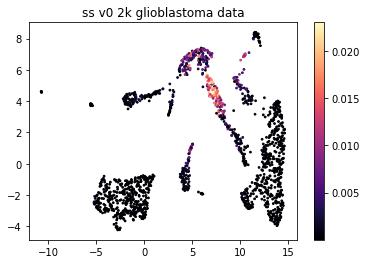

In [10]:
%matplotlib inline

plt.scatter(umap1, umap2, s = 3, c = glioblastoma2k, cmap = 'magma')
plt.title('ss v0 2k glioblastoma data')
# plt.axis('equal')
# plt.clim([0, 1])
plt.xlim()
plt.colorbar()
plt.show()

In [23]:
# additionally accounts for manifold dimension (can be estimated from isomap)
def computeSsdim(X, dim, kfunc, nballs, spacing, Rdist, version, rmax = None):
    sce = c.scalar_curvature_est(X, dim, 20, kfunc, Rdist = Rdist, verbose = True, bounds = None, version = version)
    Ss = sce.estimate_all(rmax = rmax, nballs = nballs, spacing = spacing)
    return Ss

# additionally accounts for manifold dimension (can be estimated from isomap)
def plotbydim(dataname, dim, nballs, spacing, denversion):
    mtxfile = 'datasets/' + dataname + '.mtx'
    umapcds = 'datasets/' + dataname + '-UMAP.csv'
    a = mmread(mtxfile)
    A = a.todense()
    B = (A.A).T
    umap1 = []
    umap2 = []
    with open(umapcds, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            umap1.append(float(row['UMAP-1']))
            umap2.append(float(row['UMAP-2']))
    bioSs = computeSsdim(B, dim, 0, nballs, spacing, None, denversion, None)
    
    %matplotlib inline
    pltname = dataname + ' ss dim ' + str(dim)
    plt.scatter(umap1, umap2, s = 3, c = bioSs, cmap = 'magma')
    plt.title(pltname)
    plt.axis('equal')
    plt.clim([0, 0.025])
    plt.xlim()
    plt.colorbar()
    plt.show()

    return (umap1, umap2), bioSs

# uses PCA coordinates instead of original raw data for computing curvatures
def plotPCAbydim(dataname, dim, nballs, spacing, denversion):
    umapcds = 'datasets/' + dataname + '-UMAP.csv'
    pcacds = 'datasets/' + dataname + '-PCA.csv'
    B = np.genfromtxt(pcacds, delimiter=',')[1:, 1:]
    umap1 = []
    umap2 = []
    with open(umapcds, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            umap1.append(float(row['UMAP-1']))
            umap2.append(float(row['UMAP-2']))
    bioSs = computeSsdim(B, dim, 0, nballs, spacing, None, denversion, None)
    
    %matplotlib inline
    pltname = dataname + ' ss dim ' + str(dim)
    plt.scatter(umap1, umap2, s = 3, c = bioSs, cmap = 'magma')
    plt.title(pltname)
    # plt.axis('equal')
    # plt.clim([0, 0.025])
    plt.xlim()
    plt.colorbar()
    plt.show()

    return (umap1, umap2), bioSs

computed Rdist
computed nearest neighbor distances
computed density


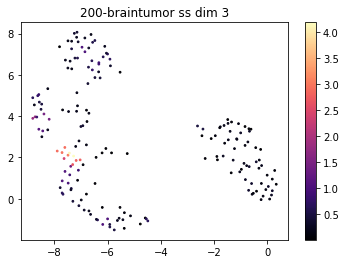

In [24]:
umap200, bioSs200 = plotPCAbydim('200-braintumor', 3, 250, 0.01, 0)

computed Rdist
computed nearest neighbor distances
computed density


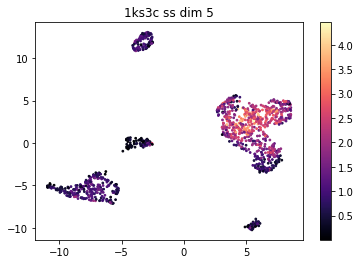

In [25]:
umap1k, bioSs1k = plotPCAbydim('1ks3c', 5, 250, 0.01, 0)

computed Rdist
computed nearest neighbor distances
computed density


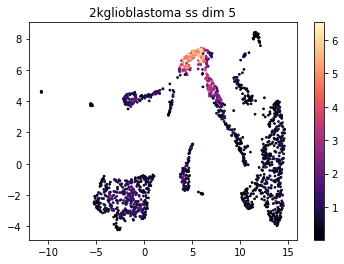

In [26]:
umap2k, bioSs2k = plotPCAbydim('2kglioblastoma', 5, 250, 0.01, 0)

computed Rdist
computed nearest neighbor distances
computed density


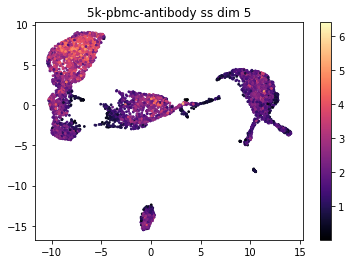

In [27]:
umap5kab, bioSs5kab = plotPCAbydim('5k-pbmc-antibody', 5, 250, 0.01, 0)

computed Rdist
computed nearest neighbor distances
computed density


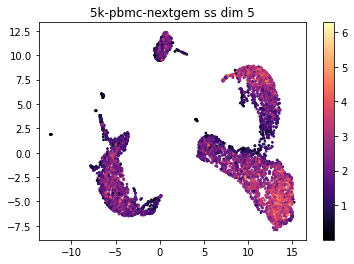

In [28]:
umap5kab, bioSs5kab = plotPCAbydim('5k-pbmc-nextgem', 5, 250, 0.01, 0)

computed Rdist
computed nearest neighbor distances
computed density
computed Rdist
computed nearest neighbor distances
computed density
computed Rdist
computed nearest neighbor distances
computed density
computed Rdist
computed nearest neighbor distances
computed density
computed Rdist
computed nearest neighbor distances
computed density
computed Rdist
computed nearest neighbor distances
computed density
computed Rdist
computed nearest neighbor distances
computed density
computed Rdist
computed nearest neighbor distances
computed density
computed Rdist
computed nearest neighbor distances
computed density


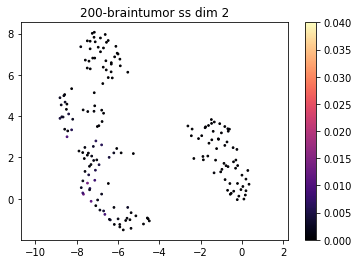

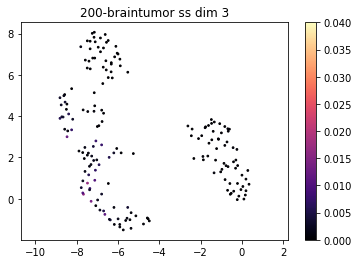

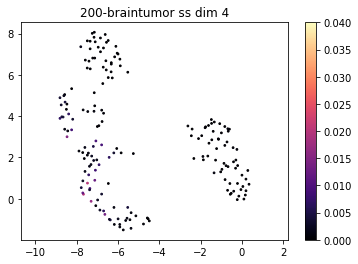

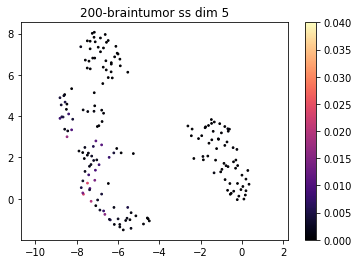

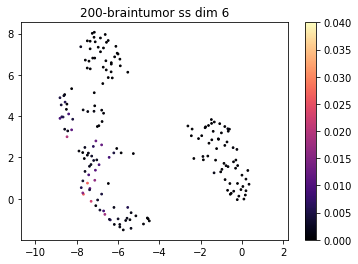

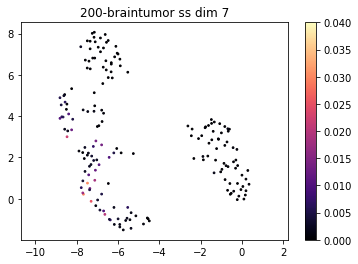

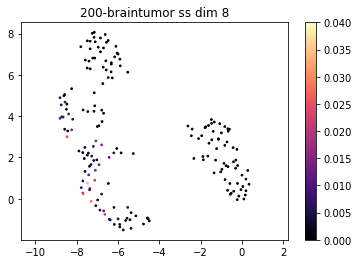

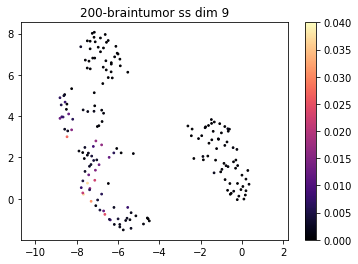

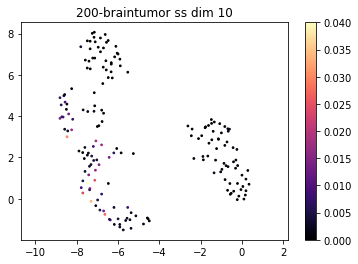

In [19]:
all200ss = plotbydim('200-braintumor', 250, 0.01, 0)

For each dataset:
* get the eigenvalues from Isomap
* compute and plot residuals
* determine manifold dimension from the "elbow" of the curve

In [46]:
iso = Isomap(n_neighbors = 20, n_components = 97, n_jobs = -1)
a = mmread('datasets/200-braintumor.mtx')
A = a.todense()
B = (A.A).T
iso.fit(B)

Isomap(n_components=97, n_jobs=-1, n_neighbors=20)

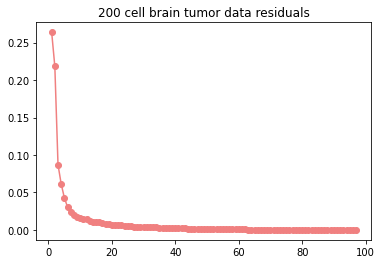

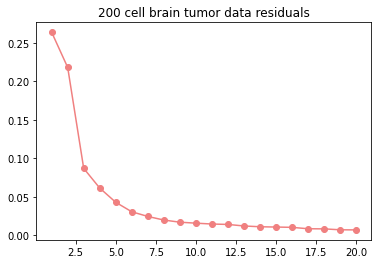

In [77]:
eigen = iso.kernel_pca_.eigenvalues_
resids = [value/sum(eigen) for value in eigen]
%matplotlib inline
plt.plot([i for i in range(1, 98)], resids, color = 'lightcoral', marker = 'o')
plt.title('200 cell brain tumor data residuals')
plt.xlim()
plt.show()

%matplotlib inline
plt.plot([i for i in range(1, 21)], resids[:20], color = 'lightcoral', marker = 'o')
plt.title('200 cell brain tumor data residuals')
plt.xlim()
plt.show()


In [63]:
iso2 = Isomap(n_neighbors = 20, n_components = 500, n_jobs = -1)
a = mmread('datasets/1ks3c.mtx')
A = a.todense()
B = (A.A).T
iso2.fit(B)

Isomap(n_components=500, n_jobs=-1, n_neighbors=20)

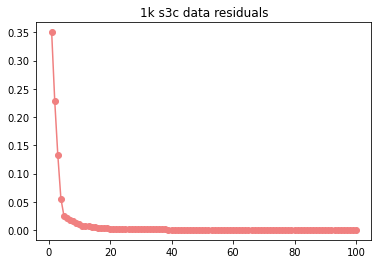

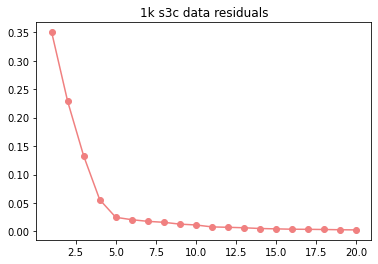

In [78]:
eigen = iso2.kernel_pca_.eigenvalues_
resids = [value/sum(eigen) for value in eigen]
%matplotlib inline
plt.plot([i for i in range(1, 101)], resids[:100], color = 'lightcoral', marker = 'o')
plt.title('1k s3c data residuals')
plt.xlim()
plt.show()

%matplotlib inline
plt.plot([i for i in range(1, 21)], resids[:20], color = 'lightcoral', marker = 'o')
plt.title('1k s3c data residuals')
plt.xlim()
plt.show()

In [20]:
iso3 = Isomap(n_neighbors = 20, n_components = 500, n_jobs = -1)
a = mmread('datasets/2kglioblastoma.mtx')
A = a.todense()
B = (A.A).T
iso3.fit(B)

Isomap(n_components=500, n_jobs=-1, n_neighbors=20)

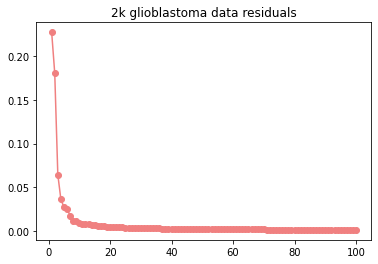

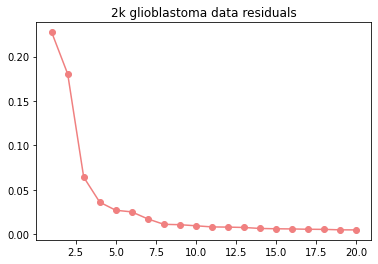

In [21]:
eigen = iso3.kernel_pca_.eigenvalues_
resids = [value/sum(eigen) for value in eigen]
%matplotlib inline
plt.plot([i for i in range(1, 101)], resids[:100], color = 'lightcoral', marker = 'o')
plt.title('2k glioblastoma data residuals')
plt.xlim()
plt.show()

%matplotlib inline
plt.plot([i for i in range(1, 21)], resids[:20], color = 'lightcoral', marker = 'o')
plt.title('2k glioblastoma data residuals')
plt.xlim()
plt.show()

In [71]:
iso4 = Isomap(n_neighbors = 20, n_components = 500, n_jobs = -1)
a = mmread('datasets/5k-pbmc-antibody.mtx')
A = a.todense()
B = (A.A).T
iso4.fit(B)

Isomap(n_components=500, n_jobs=-1, n_neighbors=20)

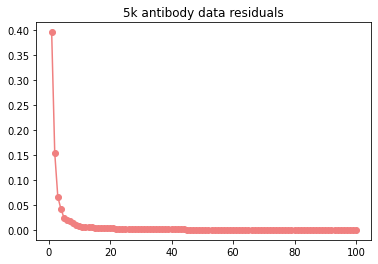

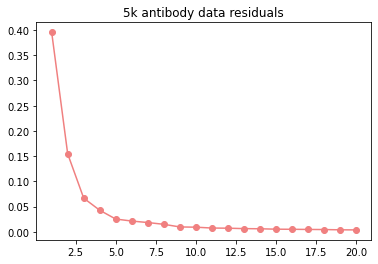

In [75]:
eigen = iso4.kernel_pca_.eigenvalues_
resids = [value/sum(eigen) for value in eigen]
%matplotlib inline
plt.plot([i for i in range(1, 101)], resids[:100], color = 'lightcoral', marker = 'o')
plt.title('5k antibody data residuals')
plt.xlim()
plt.show()

%matplotlib inline
plt.plot([i for i in range(1, 21)], resids[:20], color = 'lightcoral', marker = 'o')
plt.title('5k antibody data residuals')
plt.xlim()
plt.show()

In [80]:
iso5 = Isomap(n_neighbors = 20, n_components = 500, n_jobs = -1)
a = mmread('datasets/5k-pbmc-nextgem.mtx')
A = a.todense()
B = (A.A).T
iso5.fit(B)

Isomap(n_components=500, n_jobs=-1, n_neighbors=20)

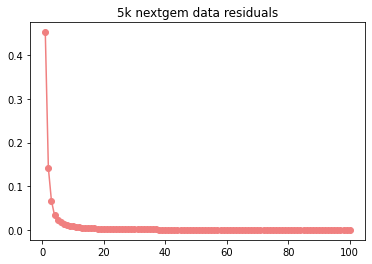

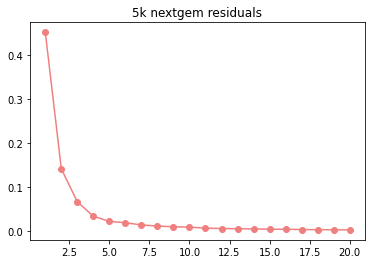

In [83]:
eigen = iso5.kernel_pca_.eigenvalues_
resids = [value/sum(eigen) for value in eigen]
%matplotlib inline
plt.plot([i for i in range(1, 101)], resids[:100], color = 'lightcoral', marker = 'o')
plt.title('5k nextgem data residuals')
plt.xlim()
plt.show()

%matplotlib inline
plt.plot([i for i in range(1, 21)], resids[:20], color = 'lightcoral', marker = 'o')
plt.title('5k nextgem residuals')
plt.xlim()
plt.show()